In [ ]:
import numpy as np 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


In [ ]:
from google.colab import files 
file = files.upload()

Saving Bitcoin Historical Data - Investing.com (2).csv to Bitcoin Historical Data - Investing.com (2).csv


In [ ]:
# import dataset
dataset = pd.read_csv("Bitcoin Historical Data - Investing.com (2).csv")
dataset.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 31, 2022","23,303.4","23,634.2","24,179.3","23,236.2",138.84K,-1.40%
1,"Jul 30, 2022","23,634.2","23,774.2","24,605.3","23,521.8",168.72K,-0.59%
2,"Jul 29, 2022","23,774.3","23,850.2","24,340.0","23,451.4",221.66K,-0.32%
3,"Jul 28, 2022","23,850.0","22,957.7","24,190.5","22,611.6",268.32K,3.88%
4,"Jul 27, 2022","22,958.3","21,248.0","23,027.8","21,047.5",242.66K,8.05%


In [ ]:
dataset.isnull().sum() / len(dataset)

Date        0.0
Price       0.0
Open        0.0
High        0.0
Low         0.0
Vol.        0.0
Change %    0.0
dtype: float64

In [ ]:
dataset.drop(['Date','Open', 'High', 'Low', 'Vol.', 'Change %' ],1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.head(5)

,Price
0,"23,303.4"
1,"23,634.2"
2,"23,774.3"
3,"23,850.0"
4,"22,958.3"


In [ ]:
prediction_days = 30 
dataset["Prediction"] = dataset[["Price"]].shift(-prediction_days)

In [ ]:
dataset.head(5)

,Price,Prediction
0,"23,303.4","19,262.9"
1,"23,634.2","19,926.6"
2,"23,774.3","20,111.3"
3,"23,850.0","20,278.0"
4,"22,958.3","20,730.2"


In [ ]:
# create the independent dataset

# convert the dataset into numpy array 
x = np.array(dataset.drop(["Prediction"],1))

# Remove the last 30 
x = x[:len(dataset)-prediction_days]

print(x)
# remove comma in every element
for i in x :
  for j in i : 
    j = j.replace(",","")
     
    j = float(j) # convert to float
    i[0] = j # assigned the value
print(x)


[['23,303.4']
 ['23,634.2']
 ['23,774.3']
 ...
 ['3,502.5']
 ['3,467.9']
 ['3,437.2']]
[[23303.4]
 [23634.2]
 [23774.3]
 ...
 [3502.5]
 [3467.9]
 [3437.2]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
# create dependent dataset 
y = np.array(dataset["Prediction"])

# get all of the value except the last 30 row 
y = y[:-prediction_days]
print(y)

['19,262.9' '19,926.6' '20,111.3' ... '3,780.1' '3,873.8' '3,809.4']


In [ ]:
y = y.reshape(-1,1)
print(y)

[['19,262.9']
 ['19,926.6']
 ['20,111.3']
 ...
 ['3,780.1']
 ['3,873.8']
 ['3,809.4']]


In [ ]:
# remove comma in every element
for m in y :
  for n in m : 
    n = n.replace(",","")
     
    n = float(n) # convert to float
    m[0] = n # assigned the value
print(y)

[[19262.9]
 [19926.6]
 [20111.3]
 ...
 [3780.1]
 [3873.8]
 [3809.4]]


In [ ]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 1)

print(x_train.shape)
print(x_test.shape)

(1022, 1)
(256, 1)


In [ ]:
# set the prediction_days_array equal to the last 30 rows from the origianl dataset 
prediction_days_array = np.array(dataset.drop(["Prediction"],1))[-prediction_days:]
print(prediction_days_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


[['3,460.0']
 ['3,414.8']
 ['3,442.8']
 ['3,555.6']
 ['3,570.9']
 ['3,572.0']
 ['3,574.3']
 ['3,561.5']
 ['3,580.1']
 ['3,536.7']
 ['3,542.3']
 ['3,677.8']
 ['3,605.6']
 ['3,626.4']
 ['3,588.0']
 ['3,571.3']
 ['3,638.1']
 ['3,490.2']
 ['3,597.2']
 ['3,616.5']
 ['3,603.7']
 ['3,978.0']
 ['3,971.0']
 ['3,985.9']
 ['4,004.1']
 ['3,785.4']
 ['3,802.7']
 ['3,780.1']
 ['3,873.8']
 ['3,809.4']]


# Linear Regression Model

In [ ]:
# Build the model 
linear_regression = LinearRegression()

In [ ]:
model = linear_regression.fit(x_train, y_train)

In [ ]:
# find intercept and slope ( coefficient )
Q_0 = model.intercept_
print(Q_0)

Q_1 = model.coef_
print(Q_1)

[867.26503576]
[[0.94533764]]


In [ ]:
Linear_prediction = model.predict(x_test)
print(Linear_prediction)

[[39887.02148492]
 [11663.39902529]
 [32577.29271354]
 [56580.83341222]
 [ 7862.00730533]
 [29036.90871611]
 [ 6733.36869634]
 [ 9285.30765686]
 [ 5603.59568218]
 [52710.90471332]
 [48696.81202424]
 [44717.3186928 ]
 [25875.60511253]
 [ 4745.32363837]
 [48210.7194095 ]
 [51671.12784254]
 [ 8577.15523036]
 [31139.43416234]
 [29640.97946839]
 [10064.83307521]
 [ 9279.06842843]
 [11929.60610486]
 [ 4654.66575865]
 [ 5940.23041596]
 [ 6904.19120797]
 [10676.93919743]
 [ 9170.26006601]
 [15356.64411919]
 [ 8132.6574718 ]
 [28346.52863726]
 [62794.63225698]
 [ 7738.26260818]
 [ 5460.94423223]
 [ 8318.32178439]
 [54709.25395157]
 [10160.87937949]
 [ 7884.22273988]
 [10040.91603291]
 [40162.68194089]
 [46432.63384149]
 [40769.3051048 ]
 [48775.2750484 ]
 [ 9643.02342002]
 [11638.63117911]
 [11019.62409211]
 [ 5501.68828453]
 [45973.76695079]
 [ 9558.60476873]
 [40351.93853652]
 [40924.05687655]
 [18505.46926592]
 [60988.75376233]
 [ 8452.74879687]
 [41264.56749465]
 [35704.18602701]
 [27905.05

In [ ]:
Actual_value = y_test.reshape(-1)
Linear_prediction = Linear_prediction.reshape(-1)

In [ ]:
my_datasets = pd.DataFrame({"Linear_Prediction" : Linear_prediction, "Actual Value" : Actual_value })
print(my_datasets)

     Linear_Prediction Actual Value
0         39887.021485      40000.1
1         11663.399025      10675.3
2         32577.292714      36687.6
3         56580.833412      60310.8
4          7862.007305       9310.8
..                 ...          ...
251       35154.188588      50786.1
252       41586.076826      48871.5
253       53166.368389      52672.1
254        9965.761690       8728.2
255       45649.516140      37382.2

[256 rows x 2 columns]


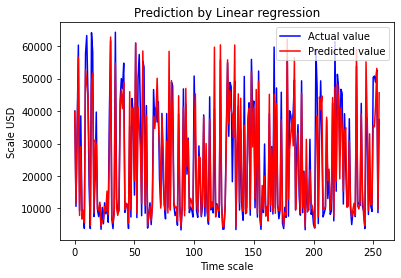

In [ ]:
# Plot between predicted value and True value
plt.plot(y_test, label = "Actual value", color ="b")
plt.plot(Linear_prediction, label = "Predicted value", color ="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
result = model.score(x_test, y_test)
print("The accuracy between actual and predicted is:",result)
                

The accuracy between actual and predicted is: 0.8750018192318672


# Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor().fit(x_train, y_train)

In [ ]:
DecisionTree_Prediction = model.predict(x_test)

In [ ]:
my_datasets = pd.DataFrame({"Decision_Prediction" : DecisionTree_Prediction, "Actual Value" : Actual_value })
print(my_datasets)

     Decision_Prediction Actual Value
0                41022.0      40000.1
1                10326.0      10675.3
2                32193.3      36687.6
3                47936.3      60310.8
4                 7742.7       9310.8
..                   ...          ...
251              48599.7      50786.1
252              46172.2      48871.5
253              55765.2      52672.1
254               9151.4       8728.2
255              53631.5      37382.2

[256 rows x 2 columns]


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, DecisionTree_Prediction)
print(score)

0.8114862873366335


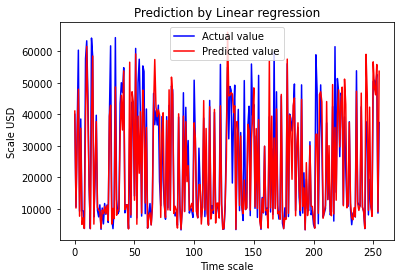

In [ ]:
# Plot between predicted value and True value
plt.plot(y_test, label = "Actual value", color ="b")
plt.plot(DecisionTree_Prediction, label = "Predicted value", color ="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()

# SVR 

In [ ]:
from sklearn.svm import SVR

Radial Basis Function Kernel

In [ ]:
rbf_SVR = SVR(kernel = 'rbf', C = 1e3, gamma = 0.0000001).fit(x_train, y_train)
rbf_SVR_predicted = rbf_SVR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
result3 = rbf_SVR.score(x_test, y_test)
print("The accuracy in RBF:", result3)

The accuracy in RBF: 0.8658501465553866


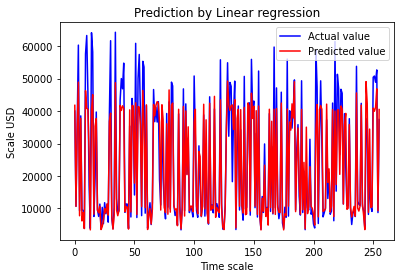

In [ ]:
# Plot between predicted value and True value
plt.plot(y_test, label = "Actual value", color ="b")
plt.plot(rbf_SVR_predicted, label = "Predicted value", color ="r")
plt.title("Prediction by Linear regression")
plt.xlabel("Time scale")
plt.ylabel("Scale USD")
plt.legend()
plt.show()

Polynomial Kernel

In [ ]:
poly_SVR = SVR(kernel = 'poly', C = 1000.0, degree = 2).fit(x_train, y_train)
poly_SVR_predicted = poly_SVR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
result2 = poly_SVR.score(x_test, y_test)
print("The accuracy in Poly:", result2)

The accuracy in Poly: 0.7735387823476696


Linear Kernel

In [ ]:
lin_SVR = SVR(kernel = 'linear', C = 1e3).fit(x_train, y_train)
lin_SVR_predicted = lin_SVR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
result1 = lin_SVR.score(x_test, y_test)
print("The accuracy in Linear:", result1)

The accuracy in Linear: -23.55347986739636
